Task 4

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# The following lines generate a random set of points in the 2D space. Please refer to make_blobs function in scikit-learn
X,Y = make_blobs(n_samples=1000, n_features=2, centers=np.array([[0,0],[10,18]]), cluster_std=np.array([9.0,9.0]))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle=True)

In [3]:
def plot_dataset(x,y):
    # This function would plot the generated points
    plt.figure()
    unique_classes = np.unique(y)
    colors = cm.magma(np.linspace(0.0,1.0), unique_classes.size)
    rainbow = cm.get_cmap('rainbow',4)
    for this_class in unique_classes:
        color = rainbow(this_class)
        indices = np.where(y == this_class)
        points = x[indices]
        plt.scatter(
            points[:,0],
            points[:,1],
            color=color,
            label="Class {}".format(this_class),
            alpha=0.5
        )
        plt.title('Data')
    plt.legend()
    plt.show()
    

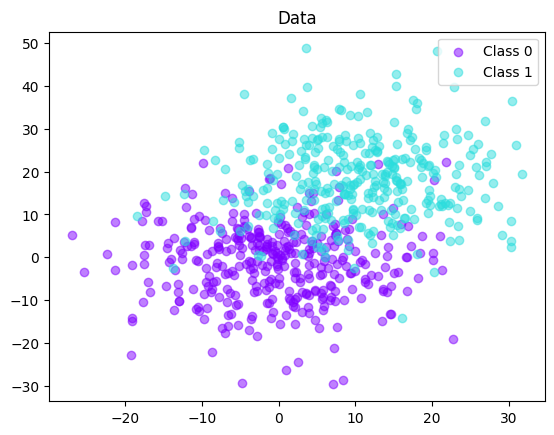

In [4]:
plot_dataset(X_train,Y_train)

In [5]:
# The following lines learn a SVM over the generated data.
# Please refer to the svm.SVC() class in scikit-learn for further details.
clf = svm.SVC(kernel='linear', degree=7, C=20, max_iter=1000,  verbose=True)

In [6]:
def fit_data(clf, train_features, train_labels, normalize=False):
    if normalize:
        normalizer = StandardScaler().fit(train_features)
        data = normalizer.transform(train_features)
    else:
        data = train_features
        normalizer=None
        
    clf.fit(data, train_labels)
    return clf, normalizer

In [7]:
clf, normalizer = fit_data(clf, X_train, Y_train, normalize=True)

[LibSVM]

In [8]:
# These are helper functions. Please do not modify them for this tutorial

def make_meshgrid(x, y, h=1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



In [9]:
# This function plots the learnt decision boundary. 
# You will need to modify this function to plot the support vectors
def plot_decision_boundary(clf, x,y, normalizer=None):
    if normalizer is not None:
        x = normalizer.transform(x)
    xx,yy = make_meshgrid(x[:,0], x[:,1])
    fig, ax = plt.subplots()
    plot_contours(ax, clf, xx, yy, cmap=cm.coolwarm, alpha=1.0, normalizer=normalizer)
    ax.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.coolwarm, s=40, edgecolors='k')
    plt.show()

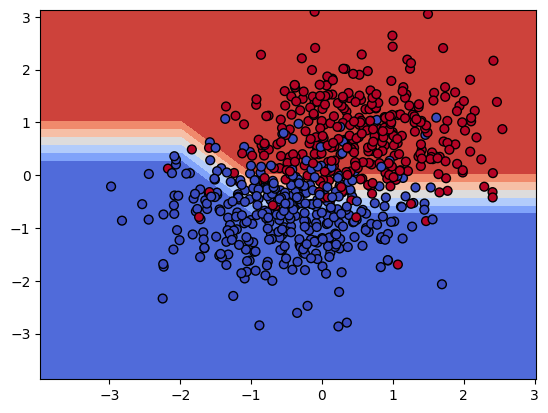

In [10]:
plot_decision_boundary(clf,X_train,Y_train, normalizer=normalizer)

In [18]:
def predict_test(clf,x_test, y_test, normalizer=None):
# If normalizer is None, then the data will be directly predicted and the accuracy comp
# Otherwise, the x_test should be normalized using the provided normalizer and then pre
# Please refer to the documentation of StandardScaler in sklearn to see how to do this.
    if normalizer:
        normalizer = StandardScaler().fit(x_test)
        x_test = normalizer.transform(x_test)
    else:
        x_test = x_test
        normalizer=None
    pred=clf.predict(x_test)
    accuracy=(pred==y_test).mean()
    return accuracy

In [19]:
print(predict_test(clf,X_test,Y_test, normalizer))

0.67


Part a)


For C= 0.1  the number of support vectors for each class {0,1} is [97 96]

For C= 0.1  the accuracy is: 0.86


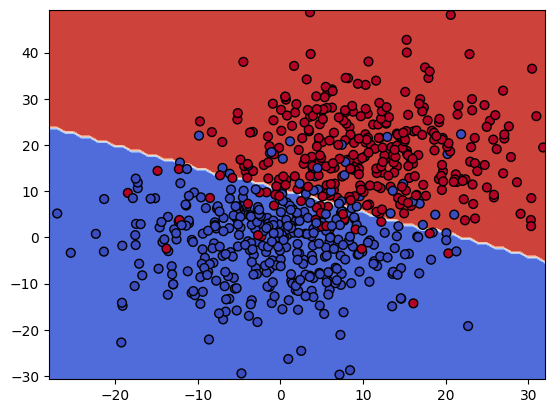


For C= 1.0  the number of support vectors for each class {0,1} is [ 71 107]

For C= 1.0  the accuracy is: 0.81


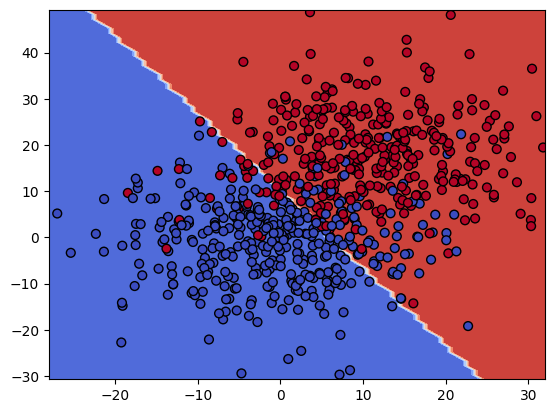


For C= 10.0  the number of support vectors for each class {0,1} is [38 64]

For C= 10.0  the accuracy is: 0.76


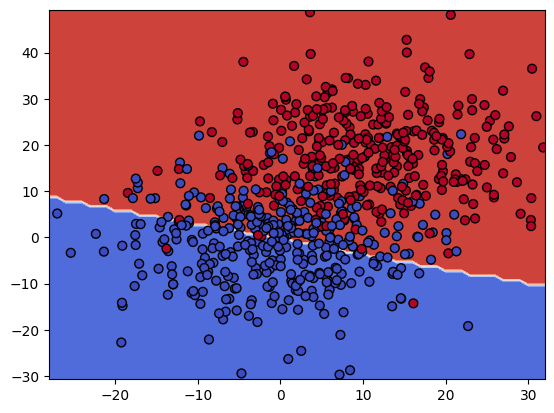


For C= 20.0  the number of support vectors for each class {0,1} is [28 46]

For C= 20.0  the accuracy is: 0.16


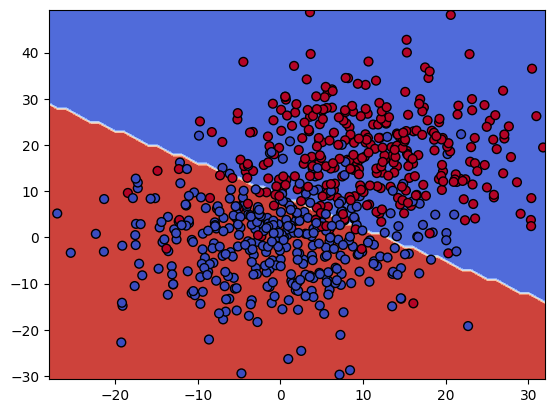


For C= 50.0  the number of support vectors for each class {0,1} is [19 34]

For C= 50.0  the accuracy is: 0.75


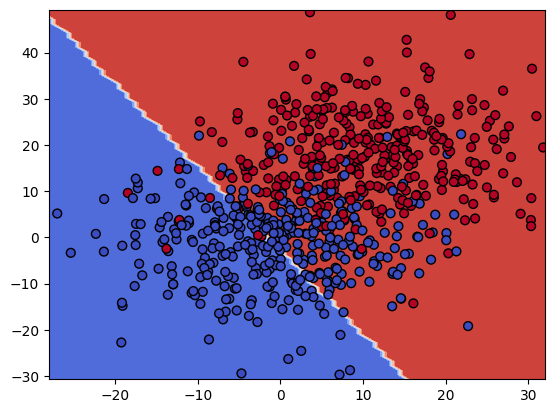

In [20]:
C=np.array([0.1, 1, 10, 20, 50])
for c in C:
    clf = svm.SVC(kernel='linear', degree=7, C=c, max_iter=1000, verbose=False)
    clf, normalizer= fit_data(clf, X_train, Y_train, normalize=False)
    print('\nFor C=',c,' the number of support vectors for each class {0,1} is',clf.n_support_)
    print('\nFor C=',c,' the accuracy is: %0.2f'%predict_test(clf,X_test,Y_test, normalizer))
    plot_decision_boundary(clf,X_train,Y_train, normalizer=normalizer)

higher C would result in less regularization. hence we would have a more complex model, and less points to be misclassified (more tolerant to it) ; also we  may have a larger margin. We have less number of support vectors

Part b)


For C= 0.1  the number of support vectors for each class {0,1} is [113 113]

For C= 0.1  the accuracy is: 0.85


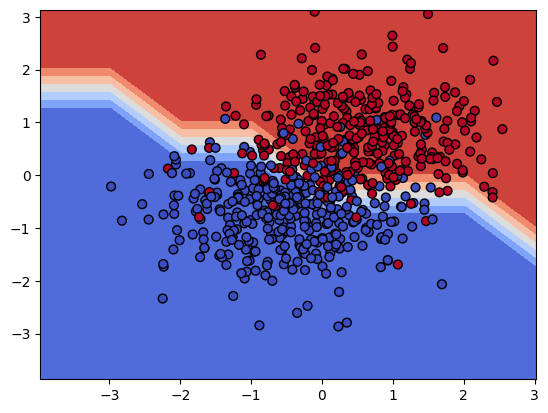


For C= 1.0  the number of support vectors for each class {0,1} is [97 98]

For C= 1.0  the accuracy is: 0.85


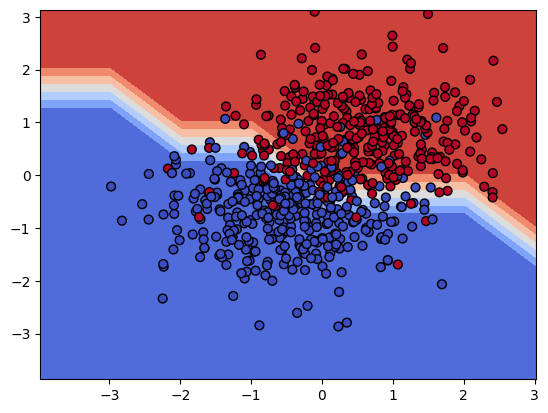


For C= 10.0  the number of support vectors for each class {0,1} is [95 96]

For C= 10.0  the accuracy is: 0.85


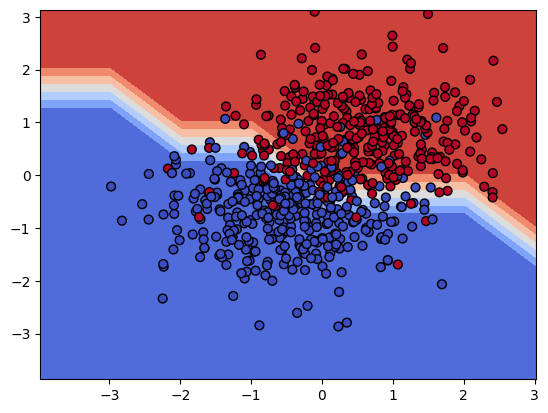


For C= 20.0  the number of support vectors for each class {0,1} is [96 94]

For C= 20.0  the accuracy is: 0.86


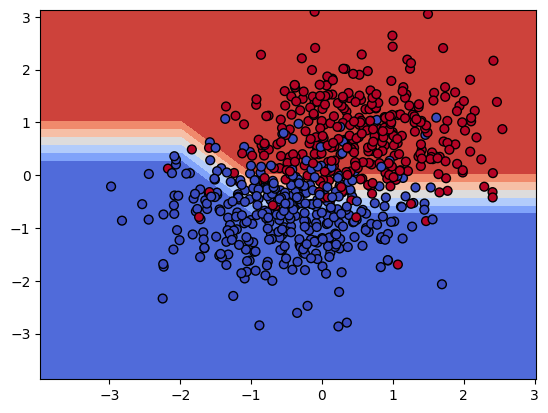


For C= 50.0  the number of support vectors for each class {0,1} is [92 92]

For C= 50.0  the accuracy is: 0.67


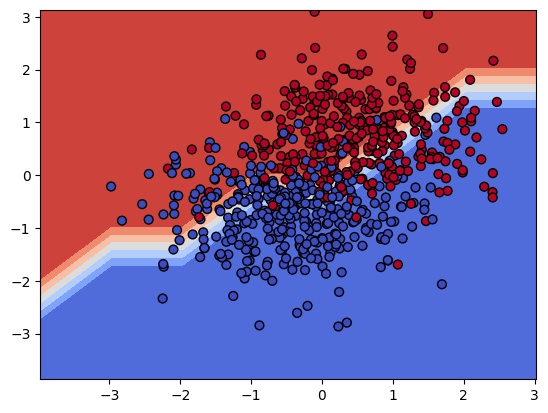

In [21]:
C=np.array([0.1, 1, 10, 20, 50])
for c in C:
    clf = svm.SVC(kernel='linear', degree=7, C=c, max_iter=1000, verbose=False)
    clf, normalizer= fit_data(clf, X_train, Y_train, normalize=True)
    print('\nFor C=',c,' the number of support vectors for each class {0,1} is',clf.n_support_)
    print('\nFor C=',c,' the accuracy is: %0.2f'%predict_test(clf,X_test,Y_test, normalizer))
    plot_decision_boundary(clf,X_train,Y_train, normalizer=normalizer)

Normalizing the data helps in achieving faster convergence during the training process. Features with larger scales might dominate the optimization process without normalization, leading to longer training times.

part c)


For C= 1  the number of support vectors for each class {0,1} is [103 102]

For C= 1  the accuracy is: 0.86


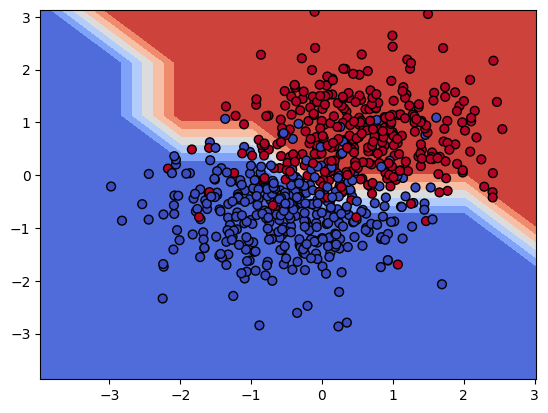

In [34]:
c = 1
clf = svm.SVC(kernel='rbf', degree=7, C=c, max_iter=1000, verbose=False)
clf, normalizer= fit_data(clf, X_train, Y_train, normalize=True)
print('\nFor C=',c,' the number of support vectors for each class {0,1} is',clf.n_support_)
print('\nFor C=',c,' the accuracy is: %0.2f'%predict_test(clf,X_test,Y_test, normalizer))
plot_decision_boundary(clf,X_train,Y_train, normalizer=normalizer)


For C= 1  the number of support vectors for each class {0,1} is [205 204]

For C= 1  the accuracy is: 0.65


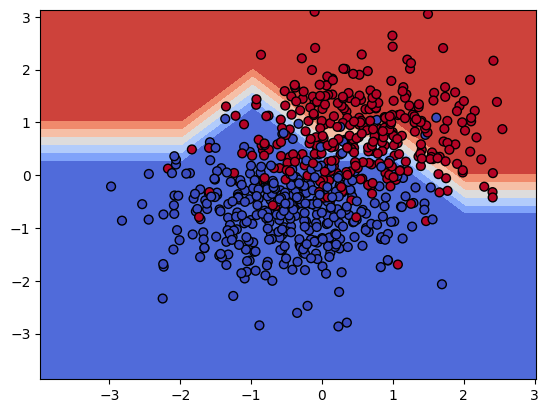

In [39]:
c = 1
clf = svm.SVC(kernel='poly', degree=7, C=c, max_iter=1000, verbose=False)
clf, normalizer= fit_data(clf, X_train, Y_train, normalize=True)
print('\nFor C=',c,' the number of support vectors for each class {0,1} is',clf.n_support_)
print('\nFor C=',c,' the accuracy is: %0.2f'%predict_test(clf,X_test,Y_test, normalizer))
plot_decision_boundary(clf,X_train,Y_train, normalizer=normalizer)


For C= 1  the number of support vectors for each class {0,1} is [74 75]

For C= 1  the accuracy is: 0.79


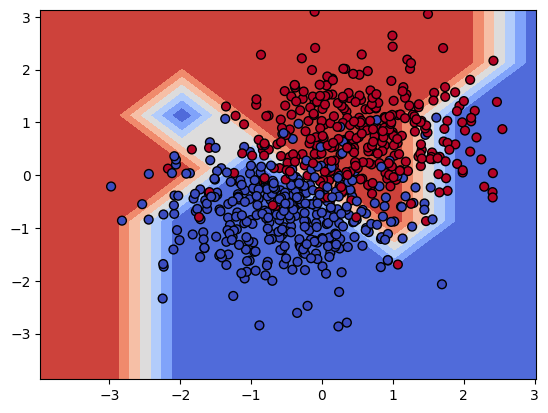

In [40]:
c = 1
clf = svm.SVC(kernel='sigmoid', degree=7, C=c, max_iter=1000, verbose=False)
clf, normalizer= fit_data(clf, X_train, Y_train, normalize=True)
print('\nFor C=',c,' the number of support vectors for each class {0,1} is',clf.n_support_)
print('\nFor C=',c,' the accuracy is: %0.2f'%predict_test(clf,X_test,Y_test, normalizer))
plot_decision_boundary(clf,X_train,Y_train, normalizer=normalizer)

RBF kernel has the better accuracy here